# Analyse Exploratoire du fichier myreport_swap_full.csv

### Imports (fichier & modules)

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [222]:
tab = pd.read_csv('../../data/logServer/myreport_swap_full.csv', sep=',', dtype={'Program_Id': str, 'Schedules_Id': str, 'Schedules_Name': str})

### Le fichier myreport_swap_full.csv

In [224]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2882  lignes et  8  colonnes dans le data frame


In [225]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Total', 'Total(RAW)',
       'Temps mort', 'Temps mort(RAW)', 'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [226]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date et heure       2882 non-null   object 
 1   Date et heure(RAW)  2881 non-null   float64
 2   Total               2195 non-null   object 
 3   Total(RAW)          2194 non-null   float64
 4   Temps mort          2195 non-null   object 
 5   Temps mort(RAW)     2194 non-null   float64
 6   Couverture          2882 non-null   object 
 7   Couverture(RAW)     2881 non-null   float64
dtypes: float64(4), object(4)
memory usage: 180.3+ KB


In [227]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure         2882
Date et heure(RAW)    2881
Total                    7
Total(RAW)              28
Temps mort               1
Temps mort(RAW)          1
Couverture               3
Couverture(RAW)          2
dtype: int64


In [228]:
tab.head()


,Date et heure,Date et heure(RAW),Total,Total(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,3 %,3.0,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,3 %,3.0,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,3 %,3.0,0 %,0.0,100 %,10000.0


### Transformation des dates

In [230]:
# Convertir toutes les dates de la colonne 'Date et heure(RAW)'
tab['Date et heure'] = tab["Date et heure"].str.split(" - ").str[0]

tab=tab.iloc[:-5]
# Si vous avez un format comme "JJ/MM/AAAA HH:MM:SS", vous pouvez préciser :
tab['Date et heure'] = pd.to_datetime(tab['Date et heure'], format="%d/%m/%Y %H:%M:%S")

In [231]:
tab.head()


,Date et heure,Date et heure(RAW),Total,Total(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,2024-08-13 00:00:00,45516.958333,NaN,NaN,NaN,NaN,0 %,0.0
1,2024-08-13 01:00:00,45517.000000,NaN,NaN,NaN,NaN,0 %,0.0
2,2024-08-13 02:00:00,45517.041667,3 %,3.0,0 %,0.0,100 %,10000.0
3,2024-08-13 03:00:00,45517.083333,3 %,3.0,0 %,0.0,100 %,10000.0
4,2024-08-13 04:00:00,45517.125000,3 %,3.0,0 %,0.0,100 %,10000.0


In [232]:
start_date = '2024-08-24 23:32:03'
end_date = '2024-10-15 23:31:49'
tab = tab[(tab['Date et heure'] >= start_date) & (tab['Date et heure'] <= end_date)]

In [233]:
tab.shape

(1248, 8)

### Réagencement et Suppression des colonnes

In [235]:
# suppression des colonnes inutiles
tab = tab.drop(columns=["Date et heure(RAW)"])
tab = tab.drop(columns=["Total"])
tab = tab.drop(columns=["Temps mort"])
tab = tab.drop(columns=["Couverture"])

# renommage des colonnes

tab.rename(columns={"Temps mort(RAW)": "swap Temps mort(%)"}, inplace=True)
tab.rename(columns={"Couverture(RAW)": "swap Couverture(%)"}, inplace=True)
tab.rename(columns={"Total(RAW)": "total swap(%)"}, inplace=True)



In [236]:
tab.head()


,Date et heure,total swap(%),swap Temps mort(%),swap Couverture(%)
288,2024-08-25 00:00:00,3.0,0.0,10000.0
289,2024-08-25 01:00:00,3.0,0.0,10000.0
290,2024-08-25 02:00:00,3.0,0.0,10000.0
291,2024-08-25 03:00:00,3.0,0.0,10000.0
292,2024-08-25 04:00:00,3.0,0.0,10000.0


In [237]:
print(type(tab["Date et heure"].iloc[0])) #vérifier le typage de date_full

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


## Analyse temporelle

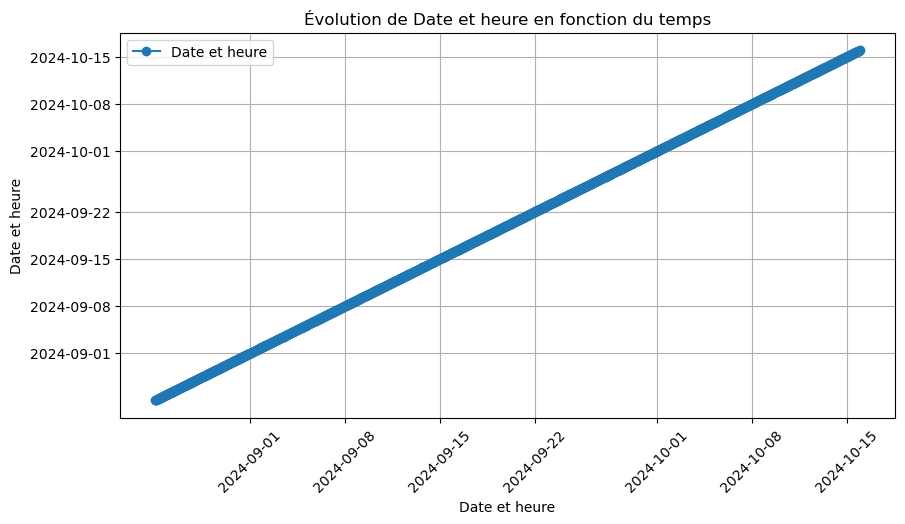

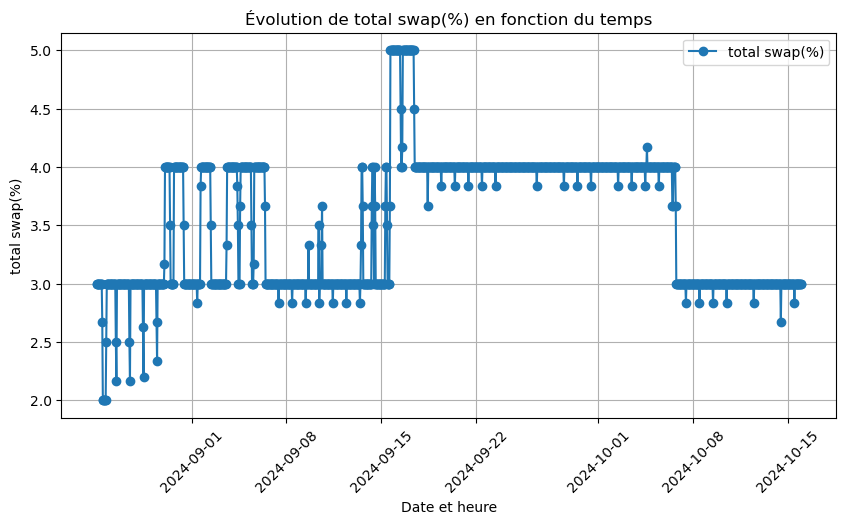

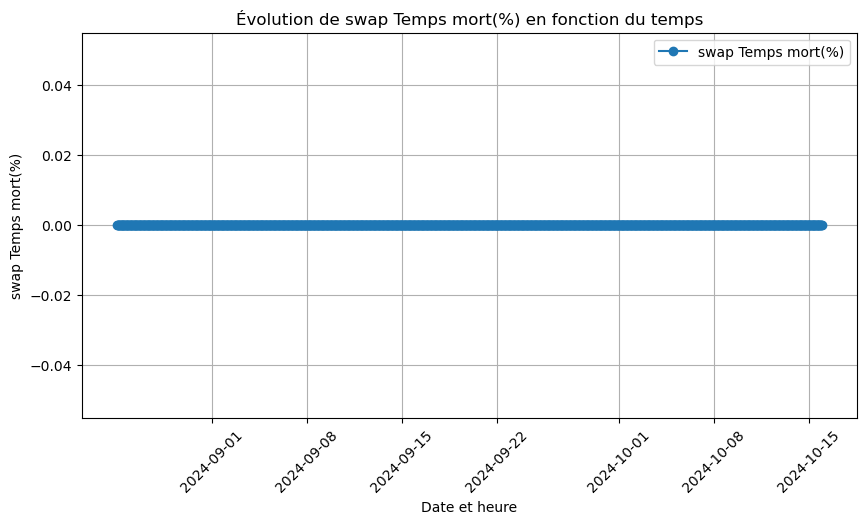

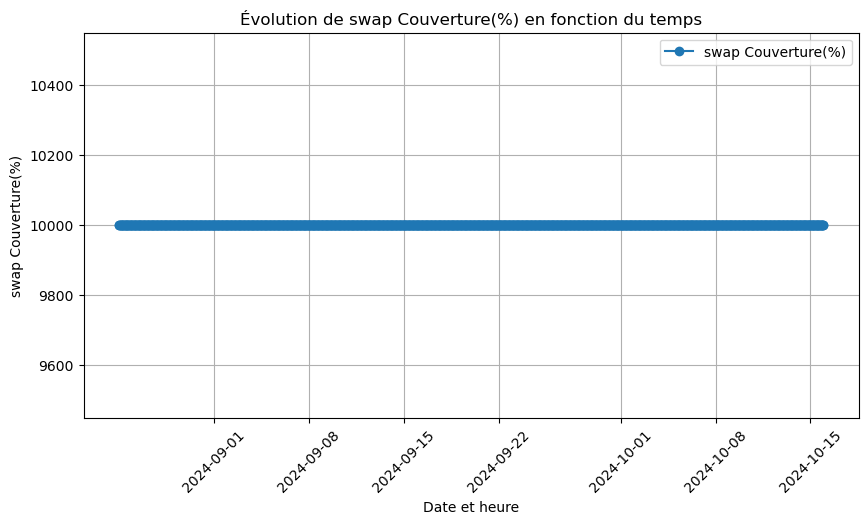

In [239]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd

import matplotlib.pyplot as plt

# Vérifier que 'date_full' est bien au format datetime
tab["Date et heure"] = pd.to_datetime(tab["Date et heure"])

# Liste des colonnes à exclure
excluded_cols = ["date_full", "date", "heure", "Date et heure(RAW)"]

# Tracer chaque colonne en fonction du temps
for col in tab.columns:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(10, 5))

        plt.plot(tab["Date et heure"], tab[col], marker='o', linestyle='-')

        plt.xlabel("Date et heure")
        plt.ylabel(f"{col}")  # Correction de la syntaxe
        plt.title(f"Évolution de {col} en fonction du temps")
        plt.legend([col])  # Correction de la légende
        plt.xticks(rotation=45)
        plt.grid()

        plt.show()

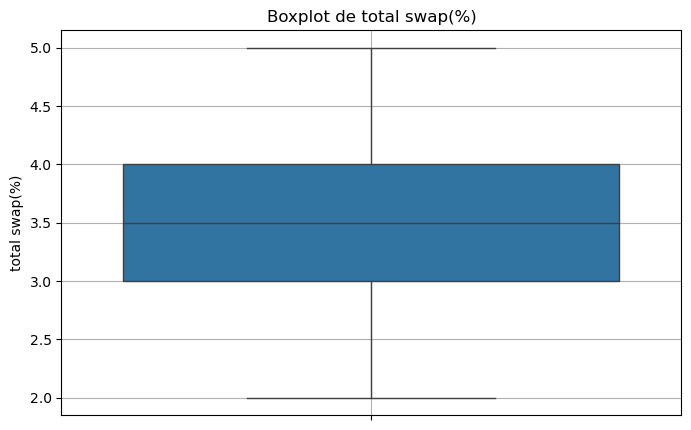

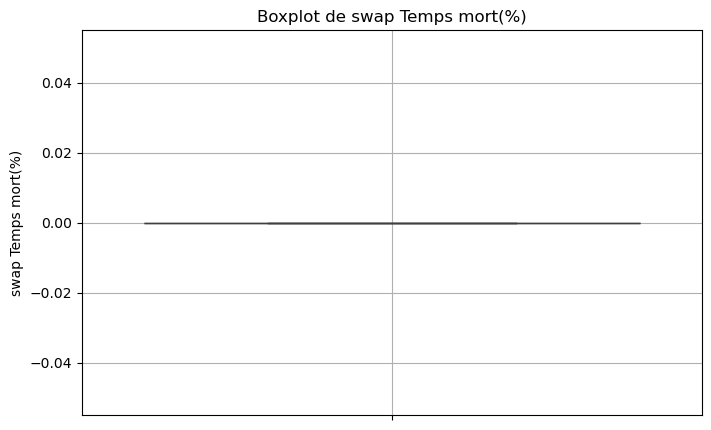

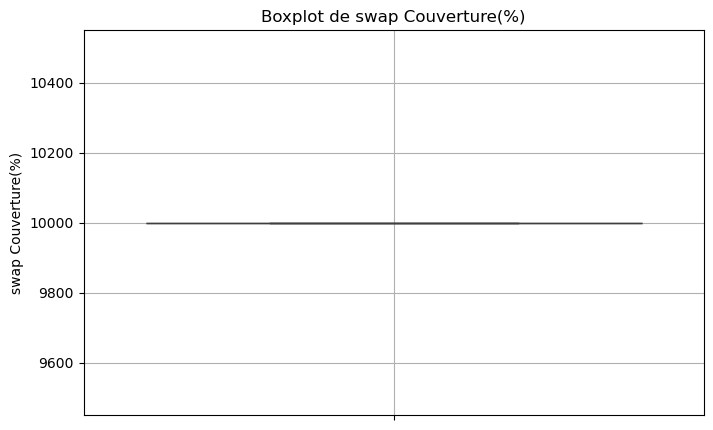

In [240]:
import seaborn as sns

# Exclure les colonnes non numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Tracer un boxplot pour chaque colonne
for col in numerical_cols:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=tab[col])
        plt.title(f"Boxplot de {col}")
        plt.grid()
        plt.show()

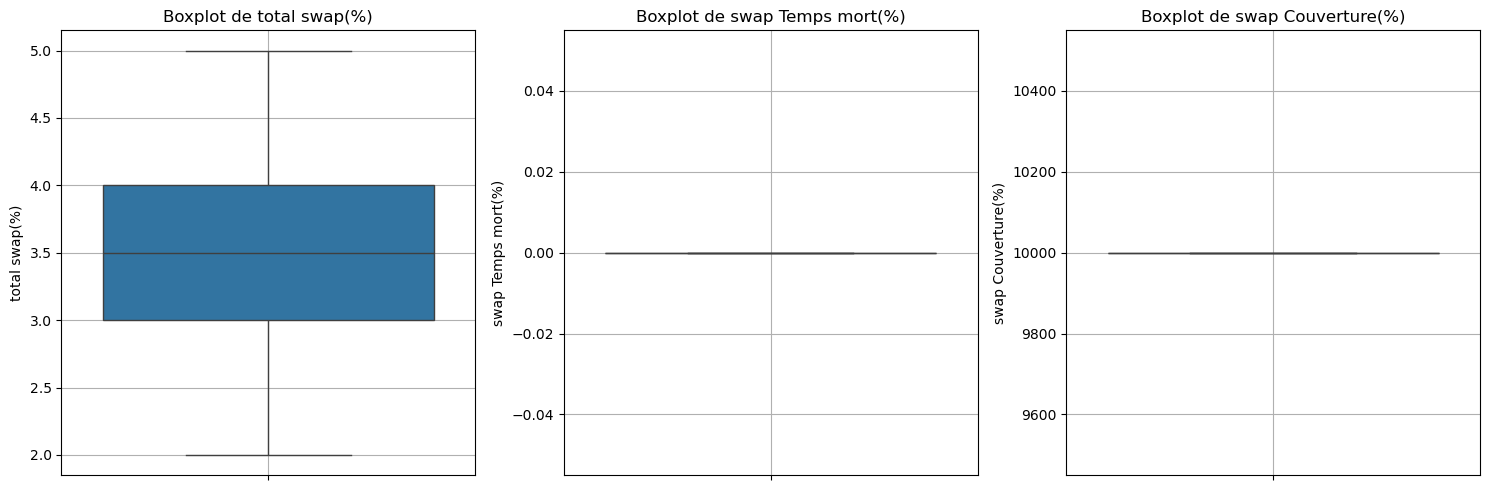

In [241]:
# Sélection des colonnes numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Filtre pour exclure les colonnes non pertinentes
cols_to_plot = [col for col in numerical_cols if col not in excluded_cols]

rows=(math.ceil(len(cols_to_plot)/3))
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques (axes)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*5))

# Convertir "axes" en un tableau 1D pour plus de flexibilité
axes = axes.flatten()

# Boucler sur les colonnes et tracer un boxplot dans chaque sous-graphique
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].grid()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### drop des colonnes inutiles

In [243]:
tab = tab.drop(columns=["swap Temps mort(%)"])
tab = tab.drop(columns=["swap Couverture(%)"])

### Enregistrement du nouveau dataframe dans un nouveau csv

In [245]:
#### ATTENTION au path et nom de fichier
tab.to_csv("../data/logServer/filtered/myreport_swap_filtered.csv", index=False, encoding='utf-8')